## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
combined_mouse_data.head()
#combined_mouse_data.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
number_of_mice = len(combined_mouse_data["Mouse ID"].value_counts())
number_of_mice

249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_data.loc[combined_mouse_data.duplicated(subset = ["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_mouse_data.loc[combined_mouse_data["Mouse ID"] == "g989",:]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
len(duplicate_mice)

13

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_duplicates = combined_mouse_data.drop_duplicates(subset="Mouse ID")
g989 = dropped_duplicates.loc[dropped_duplicates["Mouse ID"] == "g989",:]
clean_mouse_data = combined_mouse_data[combined_mouse_data["Mouse ID"] != "g989"]
combined_mouse_data = clean_mouse_data
len(clean_mouse_data)

1880

In [7]:
# Check the number of mice in the clean DataFrame.
len(dropped_duplicates)

249

In [8]:
clean_mouse_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [9]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

Mean = clean_mouse_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
Median = clean_mouse_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
Variance = clean_mouse_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
Std_dev = clean_mouse_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
Sem = clean_mouse_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_table = pd.DataFrame(Mean)
summary_table1 = summary_table.rename(columns = {'Tumor Volume (mm3)': 'Mean'})
summary_table1['Median']=Median
summary_table1['Variance']=Variance
summary_table1['Standard Deviation']=Std_dev
summary_table1['Standard Error of the Mean']=Sem
summary_table1

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

stats_df=clean_mouse_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
stats_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number Of Mice In Each Treatment Regimen')

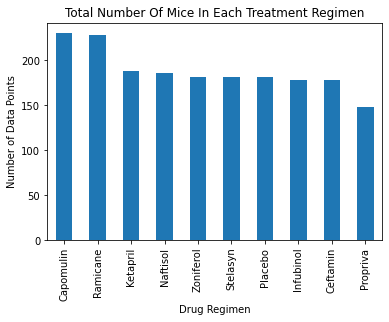

In [11]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 

drug_groups = clean_mouse_data.groupby('Drug Regimen').count()['Mouse ID']
drug_groups = drug_groups.sort_values(ascending=False)
drug_groups_df = pd.DataFrame(drug_groups)

drug_groups_df.plot.bar(legend=False)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Total Number Of Mice In Each Treatment Regimen")

Text(0.5, 1.0, 'Total Number Of Mice In Each Treatment Regimen')

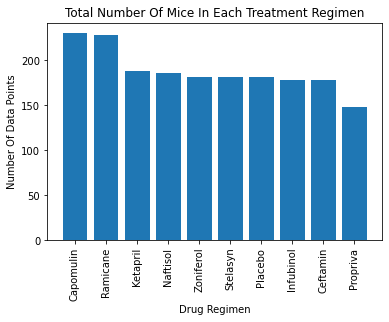

In [12]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.


Drugs = np.arange(len(drug_groups))
Ticks = [x for x in Drugs]

# X axis tick labels
Ticknames = drug_groups.reset_index()

# Bar Chart
plt.bar(Drugs, drug_groups_df['Mouse ID'])

# Formatting
plt.xticks(Ticks, Ticknames['Drug Regimen'],rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number Of Data Points")
plt.title("Total Number Of Mice In Each Treatment Regimen")

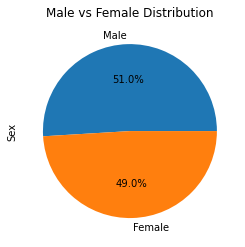

In [13]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice

## Note: this plot will be identical to the one that uses Pyplot
sex_groups = clean_mouse_data["Sex"].value_counts()

sex_groups.plot(kind="pie", autopct="%1.1f%%",startangle=0, title = "Male vs Female Distribution")

Text(0.5, 1.0, 'Male vs Female Distribution')

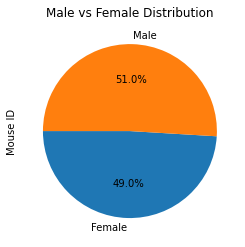

In [14]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice

##  Note: this plot will be identical to the one that uses Pandas
sex_groups = clean_mouse_data.groupby('Sex').count()['Mouse ID']
panda_pie = sex_groups.plot.pie(autopct="%1.1f%%",startangle=180)
plt.title("Male vs Female Distribution")

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capo_df = clean_mouse_data.loc[clean_mouse_data['Drug Regimen']== "Capomulin",:]
rami_df = clean_mouse_data.loc[clean_mouse_data['Drug Regimen']== "Ramicane",:]
infu_df = clean_mouse_data.loc[clean_mouse_data['Drug Regimen']== "Infubinol",:]
ceft_df = clean_mouse_data.loc[clean_mouse_data['Drug Regimen']== "Ceftamin",:]

four_drug_df = [capo_df, rami_df, infu_df, ceft_df]

# Start by getting the last (latest) timepoint for each mouse
last_tp_df = clean_mouse_data.groupby('Mouse ID').max()['Timepoint']
last_tp_df = pd.DataFrame(last_tp_df)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tp_merged = pd.merge(last_tp_df, clean_mouse_data, on=("Mouse ID","Timepoint"),how='left')


In [16]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)

four_drugs = ['Capomulin', 
              'Ramicane', 
              'Infubinol',
              'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for drug in four_drugs:
    final_tumor_vol = last_tp_merged.loc[last_tp_merged['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    tumor_vol.append(final_tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug_df in four_drug_df:
    quartiles = drug_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print (f'{drug}s potenital outliers: {outliers}') 
   
   

Ceftamins potenital outliers: 3      62.999356
22     56.057749
88     61.849023
94     68.923185
106    67.748662
107    57.918381
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
209    67.527482
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64
Ceftamins potenital outliers: 3      62.999356
88     61.849023
94     68.923185
106    67.748662
107    57.918381
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
209    67.527482
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64
Ceftamins potenital outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamins potenital outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


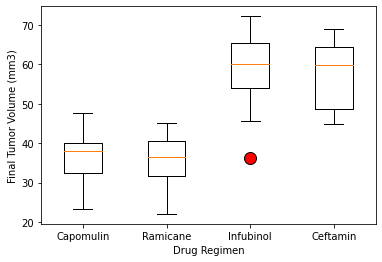

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
reddot = dict(markerfacecolor='red', markersize=12)

plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

plt.boxplot(tumor_vol, labels=four_drugs, flierprops = reddot)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment Of Mouse l509')

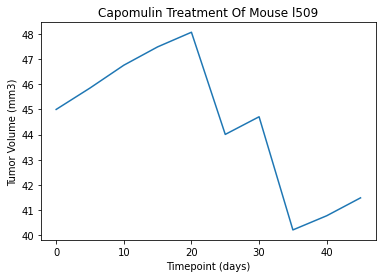

In [18]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
line_df = capo_df.loc[capo_df['Mouse ID'] == "l509"]

mouse_tp = line_df['Timepoint']
mouse_tv = line_df['Tumor Volume (mm3)']

plt.plot(mouse_tp, mouse_tv,)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment Of Mouse l509')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

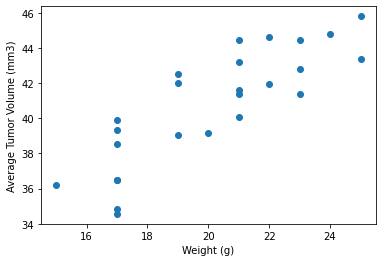

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 

capo_avg_df = capo_df.groupby(['Mouse ID']).mean()
plt.scatter(capo_avg_df['Weight (g)'],capo_avg_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
corr=round(st.pearsonr(capo_avg_df['Weight (g)'],capo_avg_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [21]:
line_regress_model = st.linregress(capo_avg_df['Weight (g)'],capo_avg_df['Tumor Volume (mm3)'])
line_regress_model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

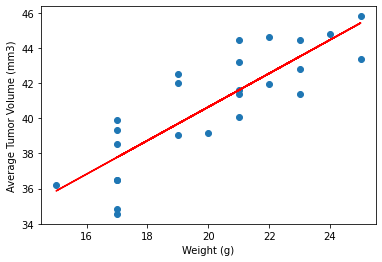

In [22]:
mslope = 0.9544396890241045
bintercept = 21.552160532685015

y_value = capo_avg_df['Weight (g)']* mslope + bintercept
plt.scatter(capo_avg_df['Weight (g)'],capo_avg_df['Tumor Volume (mm3)'])
plt.plot(capo_avg_df['Weight (g)'],y_value,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()